In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from time import time


In [0]:
batch_size = 128
num_classes = 10
epochs = 10
# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.3508 - acc: 0.8880 - val_loss: 0.1011 - val_acc: 0.9665
Epoch 2/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0878 - acc: 0.9720 - val_loss: 0.0541 - val_acc: 0.9840
Epoch 3/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0623 - acc: 0.9811 - val_loss: 0.0555 - val_acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0516 - acc: 0.9847 - val_loss: 0.0398 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0434 - acc: 0.9871 - val_loss: 0.0452 - val_acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0370 - acc: 0.9883 - val_loss: 0.0362 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0329 - acc: 0.9901 - val_loss: 0.

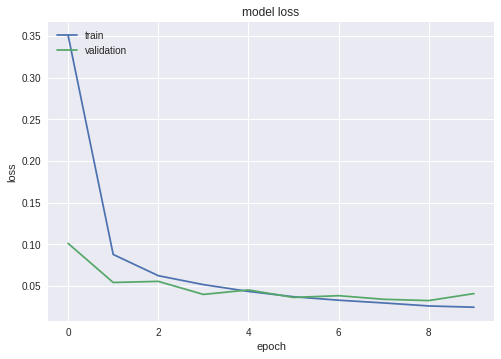

Weights

[[[[ 0.03613919  0.00352409  0.06384614 -0.17470522  0.01141953
     0.07617267  0.13755539  0.03748018  0.11455178  0.03918156
     0.0188264   0.13416223  0.15704279 -0.10288538 -0.15246865
    -0.0120285   0.13612472 -0.00861418  0.11561644  0.12819444
     0.10930726 -0.13405037 -0.07137177  0.06091807 -0.00063375
    -0.27053827  0.00504355  0.10691752 -0.09043585 -0.04295158
     0.12877497  0.10848976 -0.02116152  0.05157169  0.08394162
    -0.20078278 -0.0987035  -0.07210377 -0.01290844  0.1566917
     0.13877554 -0.01023292 -0.13158153 -0.14880803 -0.112618
     0.07085345 -0.00336795  0.12111402 -0.09663402  0.2284403
     0.10788566  0.05843697 -0.05630746 -0.14925079  0.14128605
    -0.03927135 -0.12953176  0.10959657  0.03122541  0.02804468
     0.12215278  0.02781862 -0.14455779 -0.07800733]]

  [[ 0.08642105 -0.10130075 -0.13230786 -0.1082884  -0.08351681
     0.0295016   0.09327652 -0.09688108 -0.02370043 -0.00939369
     0.02999429  0.09317163  0.02203511 -0.0

In [12]:
#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=2, write_graph=True, write_images=True)
callback=[keras.callbacks.TensorBoard(log_dir="/tmp/mnist/2".format(time()), histogram_freq=1, write_graph=True, write_images=True)]

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

X = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=callback)

plt.plot(X.history['loss'])
plt.plot(X.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


weights, biases = model.layers[0].get_weights()

print("Weights\n")
print(weights)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [13]:
LOG_DIR = '/tmp/mnist/2'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
# Install
! npm install -g localtunnel

# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

# Get url
! cat url.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.1
added 54 packages from 31 contributors in 4.984s
your url is: https://young-dog-46.localtunnel.me


In [0]:
weights, biases = model.layers[0].get_weights()
print(biases)

[ 5.2305091e-02  4.2329561e-02  2.2895745e-04  5.2398529e-02
 -1.6769962e-03  3.7942608e-03  5.2037787e-02  3.5299581e-02
  7.9607598e-02 -8.6277332e-03 -4.2480580e-03 -2.0624446e-03
  4.5489490e-02  7.3770866e-02 -1.6724458e-03  4.3317840e-02
  9.3861036e-02  1.4329603e-01  9.3229800e-02 -1.9087589e-03
  2.5267934e-03  7.8527488e-02  2.6613273e-02  6.3304435e-03
  9.8840922e-02  5.2497875e-02 -1.0301483e-02  3.7837710e-04
  2.7502151e-02  3.6927410e-03  5.5295322e-03 -2.1472098e-03
  1.2749669e-01 -5.4282760e-03 -5.0160423e-05  2.5811609e-02
  6.6094242e-02  1.5407995e-02 -6.3875001e-03 -5.9412839e-03
 -5.2355146e-03  9.5629036e-02  1.6479639e-03  6.5808021e-03
  3.2558650e-02  5.9396092e-02  2.5926530e-03  4.3830305e-02
 -6.6156511e-04  4.5381743e-02  7.1374851e-04  3.6877085e-02
 -2.3744851e-03 -3.5023768e-03 -4.4187387e-03  1.6534025e-03
  2.8542482e-04  2.2166800e-03  5.5086050e-02  2.9888425e-02
  7.4517909e-03  3.2116991e-02 -1.0055948e-02 -2.2171314e-03]


In [0]:
def plot_weights(layers,x,y):
  weights, biases = model.layers[0].get_weights()
  
  fig = plt.figure(figsize=(106,108), dpi=80)
  
  for j in range(len(weights)):
    ax = fig.add_subplot(y,x,j+1)
    ax.matshow(weights[j][0], cmap = matplotlib.cm.binary)
    
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.rcParams['figure.figsize'] = 4.5, 4.
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    return plt
  


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

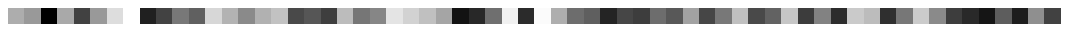

In [0]:
plot_weights(model.layers[0],8,4)